# Comparison between DFT and W90 bandstructures

In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('sci.mplstyle')

In [2]:
def read_band(fname, EFermi):
    bandData = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(bandData[:, 0])
    numBand = len(bandData[bandData[:, 0] == kDist[1]])
    Bands = (np.reshape(bandData[:, 1], (-1, len(kDist))).T) - EF
    return kDist, Bands

In [3]:
# Fermi level
EF = -2.5517      # [eV]

# Band structure from the output of Wannier90
ks_w90, en_w90 = read_band('../w90/MoS2soc_band.dat', EF)

# Band structrue from the output of Quantum ESPRESSO
ks_dft, en_dft = read_band('../band/MoS2soc.bands.gnu', EF)
# Unit of k points from DFT (2*pi/a)
k2 = 2*np.pi/3.125553
# Convert the unit of ks_dft to 1/Angstrom
ks_k2 = np.asarray(ks_dft)*k2

# high-symmetry from w90 [1/Angstrom]
kNode = np.array([0.00000, 1.00513, 1.56120, 2.56633, 3.71503])

# label of high-symmetry
kLabel = (r'X', r'$\Gamma$', r'Y', r'M', r'$\Gamma$')

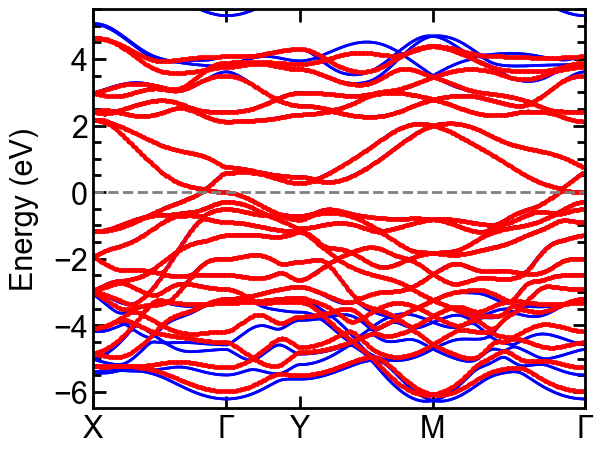

In [4]:
fig = plt.figure()

for i in range(en_dft.shape[1]):
    plt.plot(ks_k2, en_dft[:, i], color='blue', label='DFT')
    
for i in range(en_w90.shape[1]):
    plt.plot(ks_w90, en_w90[:, i], color='red', ls = 'none', marker='o', 
         markersize=2, markevery=2, markerfacecolor='none', label='W90')

plt.axhline(0.0, color='gray', ls='--')
# X-Axis
plt.xlabel('')
plt.xlim(kNode[0], kNode[-1])
# Add labels for high-symmetry points
plt.xticks(kNode, kLabel)
# Y-Axis
plt.ylabel('Energy (eV)')
plt.ylim(-6.5, 5.5)

# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.tight_layout()
fig.savefig('./band_dft_w90.png', dpi=600)
plt.show()

# Construct tight-binding model from `wannier90_hr.dat`

## Construct model

In [5]:
from pythtb import * # import TB model class

# read output from Wannier90 that should be in folder named "example_a"
# see instructions above for how to obtain the example output from 
# Wannier90

MoS2 = w90(r'../w90', 'MoS2soc')

# get tight-binding model without hopping terms above 0.01 eV and set Fermi level 
my_model = MoS2.model(zero_energy=EF,min_hopping_norm=0.01)
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 48
number of electronic states = 48
lattice vectors:
 #  0  ===>  [  3.1256 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,  5.6499 , -0.0157 ]
 #  2  ===>  [     0.0 ,  0.3757 , 30.2152 ]
positions of orbitals:
 #  0  ===>  [     0.5 ,  0.4032 ,  -0.411 ]
 #  1  ===>  [     0.5 ,  0.4032 ,  -0.411 ]
 #  2  ===>  [     0.5 ,  0.4171 , -0.4121 ]
 #  3  ===>  [     0.5 ,  0.4171 , -0.4121 ]
 #  4  ===>  [     0.5 ,  0.4168 , -0.4116 ]
 #  5  ===>  [     0.5 ,  0.4168 , -0.4116 ]
 #  6  ===>  [     0.5 ,  0.4245 , -0.4135 ]
 #  7  ===>  [     0.5 ,  0.4245 , -0.4135 ]
 #  8  ===>  [     0.5 ,  0.4205 , -0.4128 ]
 #  9  ===>  [     0.5 ,  0.4205 , -0.4128 ]
 # 10  ===>  [     0.5 ,   0.421 , -0.4126 ]
 # 11  ===>  [    

## Bandstructure

In [6]:
# solve model on a path and plot it
path_bulk = [
[0.50000,  0.00000,  0.00000],
[0.00000,  0.00000,  0.00000],
[0.00000,  0.50000,  0.00000],
[0.50000,  0.50000,  0.00000],
[0.00000,  0.00000,  0.00000]
]
# labels of the nodes
k_label = (r'X', r'$\Gamma$', r'Y', r'M', r'$\Gamma$')

# call function k_path to construct the actual path
(k_vec, k_dist, k_node) = my_model.k_path(path_bulk, 201)

# calculate the model
evals=my_model.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[ 3.12555e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  5.64988e+00 -1.57120e-02]
 [ 0.00000e+00  3.75691e-01  3.02152e+01]]
k-space metric tensor
 [[ 1.02364e-01  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  3.13299e-02 -5.65410e-05]
 [ 0.00000e+00 -5.65410e-05  1.09527e-03]]
internal coordinates of nodes
 [[0.5 0.  0. ]
 [0.  0.  0. ]
 [0.  0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]
reciprocal-space lattice vectors
 [[ 3.19943e-01  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  1.76989e-01 -2.20065e-03]
 [ 0.00000e+00  9.20348e-05  3.30948e-02]]
cartesian coordinates of nodes
 [[ 0.15997  0.       0.     ]
 [ 0.       0.       0.     ]
 [ 0.       0.08849 -0.0011 ]
 [ 0.15997  0.08849 -0.0011 ]
 [ 0.       0.       0.     ]]
list of segments:
  length = 0.15997  from  [0.5 0.  0. ]  to  [0. 0. 0.]
  length =  0.0885  from  [0. 0. 0.]  to  [0.  0.5 0. ]
  length = 0.15997  from  [0.  0.5 0. ]  to  [0.5 0.5 0. ]
  length = 0.18282

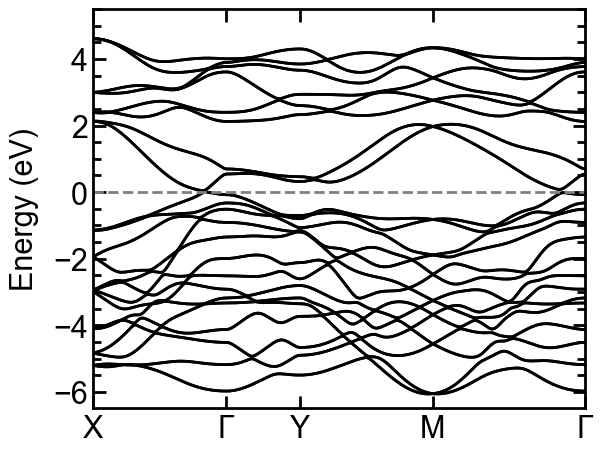

In [7]:
# plotting the tight-binding model
fig = plt.figure()
for i in range(evals.shape[0]):
    plt.plot(k_dist, evals[i], color='black')

plt.axhline(0.0, color='gray', ls='--')
# X-axis
plt.xlabel('')
plt.xlim(k_dist[0],k_dist[-1])
plt.xticks(k_node, k_label)
# Y-axis
plt.ylabel('Energy (eV)')
plt.ylim(-6.5, 5.5)
# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.tight_layout()
fig.savefig('./band_TB.png', dpi=600)
plt.show()

## Edge State

In [8]:
#Cut the slab in the x-direction
slab_model = my_model.cut_piece(20, 0, glue_edgs=False)

# compute the band structure in the entire band
path_slab = [
[0.5,  0.0],
[0.0,  0.0],
[0.5,  0.0]
]

# labels of the nodes
k_label = (r'$\overline{X}$', r'$\overline{\Gamma}$', r'$\overline{X}$')

# call function k_path to construct the actual path
(k_vec_slab, k_dist_slab ,k_node_slab) = slab_model.k_path(path_slab,201)

# calculate the model
evals_slab = slab_model.solve_all(k_vec_slab)

----- k_path report begin ----------
real-space lattice vectors
 [[ 0.00000e+00  5.64988e+00 -1.57120e-02]
 [ 0.00000e+00  3.75691e-01  3.02152e+01]]
k-space metric tensor
 [[ 3.13299e-02 -5.65410e-05]
 [-5.65410e-05  1.09527e-03]]
internal coordinates of nodes
 [[0.5 0. ]
 [0.  0. ]
 [0.5 0. ]]
list of segments:
  length =  0.0885  from  [0.5 0. ]  to  [0. 0.]
  length =  0.0885  from  [0. 0.]  to  [0.5 0. ]
node distance list: [0.     0.0885 0.177 ]
node index list:    [  0 100 200]
----- k_path report end ------------



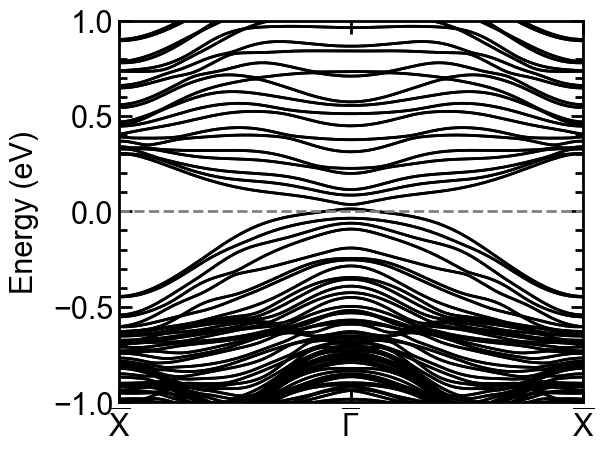

In [9]:
# plotting the edge states
fig = plt.figure()
for i in range(evals_slab.shape[0]):
    plt.plot(k_dist_slab, evals_slab[i], color='black')

plt.axhline(0.0, color='gray', ls='--')
# X-axis
plt.xlabel('')
plt.xlim(k_dist_slab[0], k_dist_slab[-1])
plt.xticks(k_node_slab, k_label)
# Y-axis
plt.ylabel('Energy (eV)')
plt.ylim(-1.0, 1.0)
# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.tight_layout()
fig.savefig('./edge_state.png', dpi=600)
plt.show()